In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


Aggregate Data Sets

In [2]:
dataTemp = []
files = ["Website_spoofing_25.csv","Website_spoofing_26.csv", "Website_spoofing_29.csv"]
for i in files:
    dataTemp.append(pd.read_csv(f"C:\\Masters\\MlFinalProjFinal\\Data\\CSV\\13.Website_spoofing\\{i}", low_memory=True))
    print(f"read {i} into memory")

df = pd.concat(dataTemp)
print(df.shape)

C:\Users\bisafai\AppData\Local\Temp\ipykernel_33068\1044468001.py:4: DtypeWarning: Columns (71,73,77,78,79,80,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,132,135,137,140,144,146,148,149,151,166,167,168,172,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTemp.append(pd.read_csv(f"C:\\Masters\\MlFinalProjFinal\\Data\\CSV\\9.Malware\\{i}", low_memory=True))


read Malware_20.csv into memory


C:\Users\bisafai\AppData\Local\Temp\ipykernel_33068\1044468001.py:4: DtypeWarning: Columns (71,73,77,78,79,80,87,93,105,112,113,114,116,117,118,141,142,147,150,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,217,247,248,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTemp.append(pd.read_csv(f"C:\\Masters\\MlFinalProjFinal\\Data\\CSV\\9.Malware\\{i}", low_memory=True))


read Malware_21.csv into memory


C:\Users\bisafai\AppData\Local\Temp\ipykernel_33068\1044468001.py:4: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,119,141,142,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTemp.append(pd.read_csv(f"C:\\Masters\\MlFinalProjFinal\\Data\\CSV\\9.Malware\\{i}", low_memory=True))


read Malware_22.csv into memory


C:\Users\bisafai\AppData\Local\Temp\ipykernel_33068\1044468001.py:4: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,120,135,137,139,140,141,142,144,146,148,149,151,166,168,172,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTemp.append(pd.read_csv(f"C:\\Masters\\MlFinalProjFinal\\Data\\CSV\\9.Malware\\{i}", low_memory=True))


read Malware_23.csv into memory
(199999, 254)


Label analysis

In [3]:
print(df["Label"].unique())
print(df["Label"].value_counts())
fig = px.bar(df["Label"].value_counts())
fig.show()

['Normal' 'Malware']
Normal     179340
Malware     20659
Name: Label, dtype: int64


In [4]:
print(df.columns)

Index(['frame.encap_type', 'frame.len', 'frame.number', 'frame.time',
       'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch',
       'frame.time_relative', 'radiotap.channel.flags.cck',
       'radiotap.channel.flags.ofdm',
       ...
       'tls.app_data_proto',
       'tls.compress_certificate.compressed_certificate_message.length',
       'tls.connection_id', 'tls.handshake.extension.type',
       'tls.handshake.extensions_key_share_group',
       'tls.handshake.session_ticket_length', 'tls.handshake.version',
       'tls.record.content_type', 'tls.record.version', 'Label'],
      dtype='object', length=254)


Null analysis

In [5]:
df.dropna(axis=1, how="all", inplace=True)
nulls = df.isna()
print(df.shape)

(199999, 192)


In [6]:
nonNullCols = []
for col in nulls.columns:
    if len(nulls[col].unique()) == 1 and nulls[col].unique()[0] == False:
       nonNullCols.append(col)
       
nulls.drop(nonNullCols, axis=1, inplace=True)

nullRatios = np.asarray([nulls[c].value_counts()[True] / nulls[c].shape[0] for c in nulls], dtype=float)
nullFilt = np.array([x > 0.5 for x in nullRatios])
colswithvals = np.array(nulls.columns[[not x for x in nullFilt]])
colswithvals = np.concatenate([colswithvals, nonNullCols])
print(f"Cols with greater then 50% values: {colswithvals}")
print(f'Count: {len(colswithvals)}')

Cols with greater then 50% values: ['radiotap.datarate' 'radiotap.mactime' 'wlan.ta' 'wlan_radio.end_tsf'
 'wlan_radio.start_tsf' 'wlan_radio.timestamp' 'frame.encap_type'
 'frame.len' 'frame.number' 'frame.time' 'frame.time_delta'
 'frame.time_delta_displayed' 'frame.time_epoch' 'frame.time_relative'
 'radiotap.channel.flags.cck' 'radiotap.channel.flags.ofdm'
 'radiotap.channel.freq' 'radiotap.dbm_antsignal' 'radiotap.length'
 'radiotap.present.tsft' 'radiotap.rxflags' 'radiotap.timestamp.ts'
 'wlan.duration' 'wlan.fc.ds' 'wlan.fc.frag' 'wlan.fc.order'
 'wlan.fc.moredata' 'wlan.fc.protected' 'wlan.fc.pwrmgt' 'wlan.fc.type'
 'wlan.fc.retry' 'wlan.fc.subtype' 'wlan.ra' 'wlan_radio.duration'
 'wlan_radio.channel' 'wlan_radio.data_rate' 'wlan_radio.frequency'
 'wlan_radio.signal_dbm' 'wlan_radio.phy' 'Label']
Count: 40


Ip analysis

In [7]:
ip = ["ip.dst","ip.proto","ip.src","ip.ttl","ip.version"]

ipOnly = df.drop(df.columns.difference(ip), axis=1)
print(ipOnly.shape)
for c in ipOnly.columns:
    print(ipOnly[c].isna().value_counts())

ipOnly.dropna(axis=0, how="any", inplace=True)

print(ipOnly.columns)

(199999, 5)
True     113445
False     86554
Name: ip.dst, dtype: int64
True     113445
False     86554
Name: ip.proto, dtype: int64
True     113445
False     86554
Name: ip.src, dtype: int64
True     113445
False     86554
Name: ip.ttl, dtype: int64
True     113344
False     86655
Name: ip.version, dtype: int64
Index(['ip.dst', 'ip.proto', 'ip.src', 'ip.ttl', 'ip.version'], dtype='object')


#### Deleting the rows from the DataFrame with NA values from the IP columns

In [8]:
print("df shape before: ", df.shape)
for i in ipOnly.columns:
    df.dropna(subset=[i], axis=0, how="any", inplace=True)

print("df shape after:", df.shape)

df shape before:  (199999, 192)
df shape after: (86554, 192)


In [9]:
pd.set_option('display.max_columns', None)
df.head(10)

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.datarate,radiotap.dbm_antsignal,radiotap.length,radiotap.mactime,radiotap.present.tsft,radiotap.rxflags,radiotap.timestamp.ts,wlan.duration,wlan.bssid,wlan.country_info.fnm,wlan.country_info.code,wlan.da,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.fixed.beacon,wlan.fixed.capabilities.ess,wlan.fixed.capabilities.ibss,wlan.fixed.timestamp,wlan.ra,wlan_radio.duration,wlan.sa,wlan.seq,wlan.ssid,wlan.ta,wlan.tag,wlan.tag.length,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.end_tsf,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.start_tsf,wlan_radio.phy,wlan_radio.timestamp,wlan.rsn.capabilities.mfpc,llc,arp,arp.hw.type,arp.proto.type,arp.hw.size,arp.proto.size,arp.opcode,arp.src.hw_mac,arp.src.proto_ipv4,arp.dst.hw_mac,arp.dst.proto_ipv4,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,data.data,data.len,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.analysis.flags,tcp.analysis.retransmission,tcp.analysis.rto_frame,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,udp.dstport,udp.srcport,udp.length,udp.payload,udp.time_relative,udp.time_delta,nbns,nbss.continuation_data,nbss.type,nbss.length,smb.access.generic_execute,smb.access.generic_read,smb.access.generic_write,smb.flags.notify,smb.flags.response,smb.flags2.nt_error,smb.flags2.sec_sig,smb.mid,smb.nt_status,smb.server_component,smb.pid.high,smb.tid,smb2.acct,smb2.auth_frame,smb2.buffer_code,smb2.cmd,smb2.data_offset,smb2.domain,smb2.fid,smb2.filename,smb2.header_len,smb2.host,smb2.msg_id,smb2.pid,smb2.previous_sesid,smb2.protocol_id,smb2.sesid,smb2.session_flags,smb2.tid,smb2.write_length,mdns,dns,dns.a,dns.count.add_rr,dns.count.answers,dns.count.auth_rr,dns.count.labels,dns.count.queries,dns.flags.authoritative,dns.flags.checkdisable,dns.flags.opcode,dns.flags.response,dns.id,dns.qry.name,dns.qry.name.len,dns.resp.name,dns.resp.ttl,dns.resp.len.1,dns.retransmit_request,dns.retransmit_response,dns.time,ssdp,http.connection,http.content_length,http.content_type,http.date,http.file_data,http.host,http.last_modified,http.location,http.request.full_uri,http.request.line,http.request.method,http.request.uri.path,http.request.uri.query,http.request.uri.query.parameter,http.request.version,http.request_in,http.response.code,http.response.code.desc,http.response.line,http.response.phrase,http.response.version,http.response_for.uri,http.referer,http.time,http.server,json.value.string,json.key,tls.alert_message.desc,tls.alert_message.level,tls.app_data_proto,tls.compress_certificate.compressed_certificate_message.length,tls.handshake.extension.type,tls.handshake.extensions_key_share_group,tls.handshake.session_ticket_length,tls.handshake.version,tls.record.content_type,tls.record.version,Label
2,23,175,1000003,Dec 15- 2020 15:26:19.582980000 GTB Standard Time,0.000071,0.000071,1608038780,386.679145,0,1,5180,NaN,-164,56,NaN,0-0-0,0x00000000,4193898392,48,0c:9d:92:54:fe:34,NaN,NaN,0c:9d:92:54:fe:30,0x00000001,0,0,0,1,0,2,0,8,NaN,NaN,NaN,NaN,0c:9d:92:54:fe:34,45,a4:b1:c1:91:4c:72,1230.0,NaN,a4:b1:c1:91:4c:72,NaN,NaN,36,173.333,NaN,5180,-56,NaN,8,NaN,NaN,llc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.114.125.69,17,192.168.2.254,64,4,906f072155354b62e5138f51bede000222c0e21d10ff00...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59103.0,36708.0,45.0,906f072155354b62e5138f51bede000222c0e21d10ff00...,34.518657,0.019609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Further Null Analysis

In [10]:
# finding columns with NaN values and ratio of NaN values to the total
nan_col = df.columns[df.isna().any()].tolist()
print("\nNaN column count: ", len(nan_col))
print("Total columns:", len(df.columns))
nan_col_ratio = df.isna().mean().tolist()


nan_column = {nan_col[i]: nan_col_ratio[i] for i in range(len(nan_col))}
print("Columns with NaN:")
print(nan_column)
print("\n")

# get columns with ratio of NaN values more than 50%
useless_col = dict((k, v) for k, v in nan_column.items() if v >= 0.5)
print("Columns with more than 50% NaN values: ")
print(useless_col)
print(f'\nNumber of useless columns {len(useless_col)}')
print(f'Column with the least ratio: {min(useless_col, key=useless_col.get)}')

#print (df.isin([' ','NULL',0]).mean())


NaN column count:  147
Total columns: 192
Columns with NaN:
{'radiotap.datarate': 0.0, 'radiotap.mactime': 0.0, 'wlan.country_info.fnm': 0.0, 'wlan.country_info.code': 0.0, 'wlan.fixed.beacon': 0.0, 'wlan.fixed.capabilities.ess': 0.0, 'wlan.fixed.capabilities.ibss': 0.0, 'wlan.fixed.timestamp': 0.0, 'wlan.ssid': 0.0, 'wlan.tag': 0.0, 'wlan.tag.length': 0.0, 'wlan_radio.end_tsf': 0.9986135822723387, 'wlan_radio.start_tsf': 0.0, 'wlan_radio.timestamp': 0.0, 'wlan.rsn.capabilities.mfpc': 0.9986135822723387, 'arp': 0.0, 'arp.hw.type': 0.0, 'arp.proto.type': 0.0, 'arp.hw.size': 0.0, 'arp.proto.size': 0.0, 'arp.opcode': 1.0, 'arp.src.hw_mac': 1.0, 'arp.src.proto_ipv4': 0.0, 'arp.dst.hw_mac': 0.0, 'arp.dst.proto_ipv4': 0.0, 'data.data': 0.0, 'data.len': 0.0, 'tcp.ack': 0.0, 'tcp.ack_raw': 0.0, 'tcp.analysis': 0.0, 'tcp.analysis.flags': 0.0, 'tcp.analysis.retransmission': 0.0, 'tcp.analysis.rto_frame': 1.0, 'tcp.checksum': 1.0, 'tcp.checksum.status': 1.0, 'tcp.flags.syn': 1.0, 'tcp.dstport': 

In [11]:
# dropping the columns with more than 50% null values

df = df.dropna(thresh=df.shape[0]*0.5,axis=1)
#df = df.dropna(thresh=df.shape[0]*0.5, axis=1, subset=df.columns.difference(ip))

print("New df shape:", df.shape)
df.head(10)

New df shape: (86554, 63)


,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.dbm_antsignal,radiotap.length,radiotap.present.tsft,radiotap.rxflags,radiotap.timestamp.ts,wlan.duration,wlan.bssid,wlan.da,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.ra,wlan_radio.duration,wlan.sa,wlan.seq,wlan.ta,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.phy,llc,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,Label
2,23,175,1000003,Dec 15- 2020 15:26:19.582980000 GTB Standard Time,0.000071,0.000071,1608038780,386.679145,0,1,5180,-164,56,0-0-0,0x00000000,4193898392,48,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0,0,0,1,0,2,0,8,0c:9d:92:54:fe:34,45,a4:b1:c1:91:4c:72,1230.0,a4:b1:c1:91:4c:72,36,173.333,5180,-56,8,llc,52.114.125.69,17,192.168.2.254,64,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
6,23,1610,1000007,Dec 15- 2020 15:26:19.583702000 GTB Standard Time,0.000478,0.000478,1608038780,386.679867,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1761.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x00007c13,2,0,61844,1,0,0,0,NaN,26d0ce95c9ad9af8acf55273422f521aefffcfd9da1d60...,534932,2278317835,80,0.001292,2.945423,Normal
7,23,1610,1000008,Dec 15- 2020 15:26:19.583703000 GTB Standard Time,0.000001,0.000001,1608038780,386.679868,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1762.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000a808,2,0,61844,1,0,0,0,NaN,19efa70f70806d29641965e143b2538a51d2aa6535f6b5...,536384,2278319287,80,0.000001,2.945424,Normal
8,23,1610,1000009,Dec 15- 2020 15:26:19.583705000 GTB Standard Time,0.000002,0.000002,1608038780,386.679870,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1763.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000d51b,2,0,61844,1,0,0,0,NaN,3451ed3d16beb83331642f6126aa381b6adc6184c3386c...,537836,2278320739,80,0.000002,2.945426,Normal
9,23,1610,1000010,Dec 15- 2020 15:26:19.583759000 GTB Standard Time,0.000054,0.000054,1608038780,386.679924,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1764.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000c804,2,0,61844,1,0,0,0,NaN,33f8f2b90e112d6b27cd9c693b07c3839cc7d8118ee05d...,539288,2278322191,80,0.000054,2.94548,Normal
11,23,170,1000012,Dec 15- 2020 15:26:19.583972000 GTB Standard Time,0.000211,0.000211,1608038780,386.680137,0,1,5180,-210,64,0-0-0,0x00000000,4193899285,48,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0,0,0,1,0,2,0,8,0c:9d:92:54:fe:34,51,94:e9:79:82:c5:77,2866.0,94:e9:79:82:c5:77,36,78.000,5180,-69,8,llc,62.75.54.77,6,192.168.2.41,64,4,4801115,81296324,1,0x000045e0,2,0,80,1,0,0,0,10,NaN,490,941287433,44060,0.001354,4.966173,Normal
14,23,1610,1000015,Dec 15- 2020 15:26:19.584492000 GTB Standard Time,0.000269,0.000269,1608038780,386.680657,0,1,5180,-105,64,0-0-0,0x00000000,4193899707,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,1,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1761.0,0c:

In [12]:
#### replacing the left over NaN values with 0 or unknown
import warnings
warnings.filterwarnings('ignore')
## checking if we havent dropped IP data
# for col in df.columns:
#     if "ip" in col:
#         print(col)
# print("\n")
cnt_num = 0
cnt = 0
non_num_feature = []
for col in df.columns:
    if (df[col].dtypes == "int64") or (df[col].dtypes == "float64") or ("udp" in col) :
        #print("number col: ", col, df[col].dtypes)
        cnt_num += 1
        df[col] = df[col].fillna(0)
    else:
        #print("string col:", col, df[col].dtypes)
        cnt += 1
        non_num_feature.append(col)
        df[col] = df[col].fillna('Unknown')

print("Numeric count and non numeric count: ",cnt_num, cnt)
print("Non numeric columns: ", non_num_feature)
df.head(10)

Numeric count and non numeric count:  29 34
Non numeric columns:  ['frame.time', 'radiotap.present.tsft', 'radiotap.rxflags', 'wlan.bssid', 'wlan.da', 'wlan.fc.ds', 'wlan.ra', 'wlan.sa', 'wlan.ta', 'llc', 'ip.dst', 'ip.proto', 'ip.src', 'ip.ttl', 'ip.version', 'tcp.ack', 'tcp.ack_raw', 'tcp.analysis', 'tcp.checksum', 'tcp.checksum.status', 'tcp.flags.syn', 'tcp.dstport', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.option_len', 'tcp.payload', 'tcp.seq', 'tcp.seq_raw', 'tcp.srcport', 'tcp.time_delta', 'tcp.time_relative', 'Label']


,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.dbm_antsignal,radiotap.length,radiotap.present.tsft,radiotap.rxflags,radiotap.timestamp.ts,wlan.duration,wlan.bssid,wlan.da,wlan.fc.ds,wlan.fc.frag,wlan.fc.order,wlan.fc.moredata,wlan.fc.protected,wlan.fc.pwrmgt,wlan.fc.type,wlan.fc.retry,wlan.fc.subtype,wlan.ra,wlan_radio.duration,wlan.sa,wlan.seq,wlan.ta,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.phy,llc,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,Label
2,23,175,1000003,Dec 15- 2020 15:26:19.582980000 GTB Standard Time,0.000071,0.000071,1608038780,386.679145,0,1,5180,-164,56,0-0-0,0x00000000,4193898392,48,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0,0,0,1,0,2,0,8,0c:9d:92:54:fe:34,45,a4:b1:c1:91:4c:72,1230.0,a4:b1:c1:91:4c:72,36,173.333,5180,-56,8,llc,52.114.125.69,17,192.168.2.254,64,4,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Normal
6,23,1610,1000007,Dec 15- 2020 15:26:19.583702000 GTB Standard Time,0.000478,0.000478,1608038780,386.679867,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1761.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x00007c13,2,0,61844,1,0,0,0,Unknown,26d0ce95c9ad9af8acf55273422f521aefffcfd9da1d60...,534932,2278317835,80,0.001292,2.945423,Normal
7,23,1610,1000008,Dec 15- 2020 15:26:19.583703000 GTB Standard Time,0.000001,0.000001,1608038780,386.679868,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1762.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000a808,2,0,61844,1,0,0,0,Unknown,19efa70f70806d29641965e143b2538a51d2aa6535f6b5...,536384,2278319287,80,0.000001,2.945424,Normal
8,23,1610,1000009,Dec 15- 2020 15:26:19.583705000 GTB Standard Time,0.000002,0.000002,1608038780,386.679870,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1763.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000d51b,2,0,61844,1,0,0,0,Unknown,3451ed3d16beb83331642f6126aa381b6adc6184c3386c...,537836,2278320739,80,0.000002,2.945426,Normal
9,23,1610,1000010,Dec 15- 2020 15:26:19.583759000 GTB Standard Time,0.000054,0.000054,1608038780,386.679924,0,1,5180,-105,64,0-0-0,0x00000000,4193898708,48,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,0,0,0,1,0,2,0,8,50:3e:aa:e3:1f:be,145,0c:9d:92:54:fe:30,1764.0,0c:9d:92:54:fe:34,36,117.000,5180,-34,8,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000c804,2,0,61844,1,0,0,0,Unknown,33f8f2b90e112d6b27cd9c693b07c3839cc7d8118ee05d...,539288,2278322191,80,0.000054,2.94548,Normal
11,23,170,1000012,Dec 15- 2020 15:26:19.583972000 GTB Standard Time,0.000211,0.000211,1608038780,386.680137,0,1,5180,-210,64,0-0-0,0x00000000,4193899285,48,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0,0,0,1,0,2,0,8,0c:9d:92:54:fe:34,51,94:e9:79:82:c5:77,2866.0,94:e9:79:82:c5:77,36,78.000,5180,-69,8,llc,62.75.54.77,6,192.168.2.41,64,4,4801115,81296324,1,0x000045e0,2,0,80,1,0,0,0,10,Unknown,490,941287433,44060,0.001354,4.966173,Normal
14,23,1610,1000015,Dec 15- 2020 15:26:19.584492000 GTB Standard Time,0.000269,0.000269,1608038780,386.680657,0,1,5180,-105,64,0-0-0,0x00000000,4193899707,48,0c:9d:92:54:fe:34,50:

In [13]:
def check_feature_type(df):
    cnt_num = 0
    cnt = 0
    global non_num_feature
    non_num_feature = []
    global num_feature
    num_feature = []
    for col in df.columns:
        if (df[col].dtypes == "int64") or (df[col].dtypes == "float64"):
            cnt_num += 1
            num_feature.append(col)
        else:
            #print("string col:", col, df[col].dtypes)
            cnt += 1
            non_num_feature.append(col)

    print("Numeric features: " + str(cnt_num) + " ; Non-numeric features: " + str(cnt))
    print("Non numeric columns: ", non_num_feature)
    
    return num_feature, non_num_feature

In [14]:
df[non_num_feature].head(10)

,frame.time,radiotap.present.tsft,radiotap.rxflags,wlan.bssid,wlan.da,wlan.fc.ds,wlan.ra,wlan.sa,wlan.ta,llc,ip.dst,ip.proto,ip.src,ip.ttl,ip.version,tcp.ack,tcp.ack_raw,tcp.analysis,tcp.checksum,tcp.checksum.status,tcp.flags.syn,tcp.dstport,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.option_len,tcp.payload,tcp.seq,tcp.seq_raw,tcp.srcport,tcp.time_delta,tcp.time_relative,Label
2,Dec 15- 2020 15:26:19.582980000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0c:9d:92:54:fe:34,a4:b1:c1:91:4c:72,a4:b1:c1:91:4c:72,llc,52.114.125.69,17,192.168.2.254,64,4,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Normal
6,Dec 15- 2020 15:26:19.583702000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x00007c13,2,0,61844,1,0,0,0,Unknown,26d0ce95c9ad9af8acf55273422f521aefffcfd9da1d60...,534932,2278317835,80,0.001292,2.945423,Normal
7,Dec 15- 2020 15:26:19.583703000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000a808,2,0,61844,1,0,0,0,Unknown,19efa70f70806d29641965e143b2538a51d2aa6535f6b5...,536384,2278319287,80,0.000001,2.945424,Normal
8,Dec 15- 2020 15:26:19.583705000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000d51b,2,0,61844,1,0,0,0,Unknown,3451ed3d16beb83331642f6126aa381b6adc6184c3386c...,537836,2278320739,80,0.000002,2.945426,Normal
9,Dec 15- 2020 15:26:19.583759000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000c804,2,0,61844,1,0,0,0,Unknown,33f8f2b90e112d6b27cd9c693b07c3839cc7d8118ee05d...,539288,2278322191,80,0.000054,2.94548,Normal
11,Dec 15- 2020 15:26:19.583972000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,0c:9d:92:54:fe:30,0x00000001,0c:9d:92:54:fe:34,94:e9:79:82:c5:77,94:e9:79:82:c5:77,llc,62.75.54.77,6,192.168.2.41,64,4,4801115,81296324,1,0x000045e0,2,0,80,1,0,0,0,10,Unknown,490,941287433,44060,0.001354,4.966173,Normal
14,Dec 15- 2020 15:26:19.584492000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x00007c13,2,0,61844,1,0,0,0,Unknown,26d0ce95c9ad9af8acf55273422f521aefffcfd9da1d60...,534932,2278317835,80,0.000733,2.946213,Normal
15,Dec 15- 2020 15:26:19.584550000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,50:3e:aa:e3:1f:be,0x00000002,50:3e:aa:e3:1f:be,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.190,6,62.75.23.81,123,4,810,74688569,1,0x0000a808,2,0,61844,1,0,0,0,Unknown,19efa70f70806d29641965e143b2538a51d2aa6535f6b5...,536384,2278319287,80,0.000058,2.946271,Normal
19,Dec 15- 2020 15:26:19.585225000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,94:e9:79:82:c5:77,0x00000002,94:e9:79:82:c5:77,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.41,6,62.75.54.77,122,4,490,941287433,1,0x00004169,2,0,44060,1,0,0,0,10,154baeb176cde1319cfd3a62c9a537059a0670392be0a7...,4801115,81296324,80,0.001253,4.967426,Normal
20,Dec 15- 2020 15:26:19.585227000 GTB Standard Time,0-0-0,0x00000000,0c:9d:92:54:fe:34,94:e9:79:82:c5:77,0x00000002,94:e9:79:82:c5:77,0c:9d:92:54:fe:30,0c:9d:92:54:fe:34,llc,192.168.2.41,6,62.75.54.77,122,4,490,941287433,1,0x000015ce,2,0,44060,1,0,0,0,10,283027fce928813f5d00f7c1c2380dff71f2031c0b4aca...,4802555,81297764,80,0.000002,4.967428,Normal


#### Converting IP and MAC address information from string to int

In [15]:
import ipaddress
import re

ipv4_addr_features = ['ip.src', 'ip.dst']

# removing rows with non IP address format and then convering those IPs to integer values using ipaddress
for col in ipv4_addr_features:
    df = df[df[col].str.contains("^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$", regex=True) == True]

for col in ipv4_addr_features:
  df[col] = df[col].apply(lambda x: int(ipaddress.IPv4Address(x)))

print("df shape after dropping non IPv4 rows: ", df.shape)

df shape after dropping non IPv4 rows:  (84482, 63)


In [16]:
from numpy import NaN


mac_addr_features = ['wlan.bssid','wlan.da', 'wlan.ra', 'wlan.sa', 'wlan.ta']

# converting  MAC addresses in the wlan features to int
def mac_to_int(mac):
    mac = str(mac)
    res = re.match('^((?:(?:[0-9a-f]{2}):){5}[0-9a-f]{2})$', mac.lower())
    if res is None:
        print(f'invalid mac address: {mac}')
        return 0
    return int(res.group(0).replace(':', ''), 16)

for col in mac_addr_features:
  df[col] = df[col].apply(lambda x: mac_to_int(x))


invalid mac address: 94:e9:79:82:c5:77-94:e9:79:82:c5:77


In [17]:
print(df["wlan.bssid"].value_counts())
print(df['wlan.da'].value_counts())
print(df['wlan.ra'].value_counts())
print(df['wlan.sa'].value_counts())
print(df['wlan.ta'].value_counts())

13870904442420    84482
Name: wlan.bssid, dtype: int64
163730486904183    21716
52241041578        18466
181083363691634    17166
13870904442416     14641
88230085205950      5283
149974441894612     4411
5416824087682        914
128437431589470      526
198797943124865      364
88230085263763       276
52242969090          215
40637418866371       154
281474976710655       70
1101088686331         59
1101097074682         54
828033738302          54
180358195354113       52
1101088686332         46
828033739094          15
Name: wlan.da, dtype: int64
13870904442420     33963
163730486904183    21716
181083363691634    17166
88230085205950      5283
149974441894612     4411
5416824087682        914
198797943124865      364
88230085263763       276
40637418866371       154
828033738302          54
180358195354113       52
1101097074682         38
281474976710655       30
1101088686331         26
1101088686332         20
828033739094          15
Name: wlan.ra, dtype: int64
13870904442416

In [20]:
udp_feaures = ['udp.dstport', 'udp.srcport', 'udp.length', 'udp.time_delta', 'ip.version']

for col in udp_feaures:
    df[col] = df[col].astype('float64')

KeyError: 'udp.dstport'

In [21]:
check_feature_type(df)

Numeric features: 36 ; Non-numeric features: 27
Non numeric columns:  ['frame.time', 'radiotap.present.tsft', 'radiotap.rxflags', 'wlan.fc.ds', 'llc', 'ip.proto', 'ip.ttl', 'ip.version', 'tcp.ack', 'tcp.ack_raw', 'tcp.analysis', 'tcp.checksum', 'tcp.checksum.status', 'tcp.flags.syn', 'tcp.dstport', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.option_len', 'tcp.payload', 'tcp.seq', 'tcp.seq_raw', 'tcp.srcport', 'tcp.time_delta', 'tcp.time_relative', 'Label']


(['frame.encap_type',
  'frame.len',
  'frame.number',
  'frame.time_delta',
  'frame.time_delta_displayed',
  'frame.time_epoch',
  'frame.time_relative',
  'radiotap.channel.flags.cck',
  'radiotap.channel.flags.ofdm',
  'radiotap.channel.freq',
  'radiotap.dbm_antsignal',
  'radiotap.length',
  'radiotap.timestamp.ts',
  'wlan.duration',
  'wlan.bssid',
  'wlan.da',
  'wlan.fc.frag',
  'wlan.fc.order',
  'wlan.fc.moredata',
  'wlan.fc.protected',
  'wlan.fc.pwrmgt',
  'wlan.fc.type',
  'wlan.fc.retry',
  'wlan.fc.subtype',
  'wlan.ra',
  'wlan_radio.duration',
  'wlan.sa',
  'wlan.seq',
  'wlan.ta',
  'wlan_radio.channel',
  'wlan_radio.data_rate',
  'wlan_radio.frequency',
  'wlan_radio.signal_dbm',
  'wlan_radio.phy',
  'ip.dst',
  'ip.src'],
 ['frame.time',
  'radiotap.present.tsft',
  'radiotap.rxflags',
  'wlan.fc.ds',
  'llc',
  'ip.proto',
  'ip.ttl',
  'ip.version',
  'tcp.ack',
  'tcp.ack_raw',
  'tcp.analysis',
  'tcp.checksum',
  'tcp.checksum.status',
  'tcp.flags.syn',


In [22]:
print(num_feature)

['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.bssid', 'wlan.da', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration', 'wlan.sa', 'wlan.seq', 'wlan.ta', 'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm', 'wlan_radio.phy', 'ip.dst', 'ip.src']


In [23]:
udp_feaures = ['udp.dstport', 'udp.srcport', 'udp.length', 'udp.time_delta', 'ip.version']

for feat in udp_feaures:
    try: 
        num_feature.remove(feat)
    except:
        print("hello")

print(num_feature)

hello
hello
hello
hello
hello
['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.bssid', 'wlan.da', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration', 'wlan.sa', 'wlan.seq', 'wlan.ta', 'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm', 'wlan_radio.phy', 'ip.dst', 'ip.src']


Noticed that wlan.bssid has the same MAC address in all rows - basic service set identifier (BSSID). THis is the MAC address of the Access Point.

#### Encoding Labels + Train-test split + Scaling
For data containing IP features

Only for Numeric Features

In [24]:
print(num_feature)

['frame.encap_type', 'frame.len', 'frame.number', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.time_epoch', 'frame.time_relative', 'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.channel.freq', 'radiotap.dbm_antsignal', 'radiotap.length', 'radiotap.timestamp.ts', 'wlan.duration', 'wlan.bssid', 'wlan.da', 'wlan.fc.frag', 'wlan.fc.order', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.pwrmgt', 'wlan.fc.type', 'wlan.fc.retry', 'wlan.fc.subtype', 'wlan.ra', 'wlan_radio.duration', 'wlan.sa', 'wlan.seq', 'wlan.ta', 'wlan_radio.channel', 'wlan_radio.data_rate', 'wlan_radio.frequency', 'wlan_radio.signal_dbm', 'wlan_radio.phy', 'ip.dst', 'ip.src']


In [25]:
from copy import copy, deepcopy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler

encoder = LabelEncoder()



Y = df["Label"]
#X = df.loc[: ,df.columns != 'Label']
X = df[num_feature]

encoded_Y = encoder.fit_transform(Y)
print(encoder.classes_)

train_data, test_data, train_labels , test_labels = train_test_split(X, encoded_Y, test_size = 0.2)

print("Train data shape:" , train_data.shape)
print("Test data shape: ", test_data.shape)

scaler=StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

['Malware' 'Normal']
Train data shape: (67585, 36)
Test data shape:  (16897, 36)


#### Need to convert data to categorical values before performing PCA - So far able to prune NaN columns and replace leftover NaN with 0 or unknown

## PCA Analysis

PCA on unscaled data
k = 2 ; Variance = 0.9830994194036828
k = 3 ; Variance = 0.9969029924247678
k = 4 ; Variance = 0.9999999999662181
k = 5 ; Variance = 0.9999999999849362
k = 10 ; Variance = 0.9999999999999433
k = 20 ; Variance = 0.9999999999998792
k = 30 ; Variance = 1.0




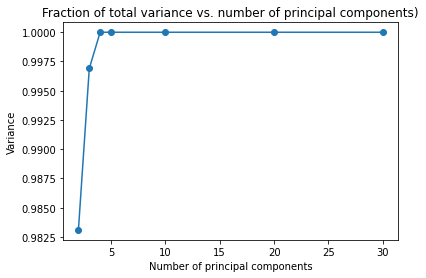

In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA

def PCA_(k, data):

  total_var = []
  for i in range(len(k)):
    pca = PCA(n_components=k[i])
    pca.fit(data)
    var_components = pca.explained_variance_ratio_
    print("k = "+ str(k[i]) + " ; Variance = "+ str(np.sum(var_components)))
    total_var.append(np.sum(var_components))


  # plotting
  print("\n")
  plt.plot(k, total_var, marker = 'o')
  plt.title('Fraction of total variance vs. number of principal components)') 
  plt.xlabel("Number of principal components")
  plt.ylabel("Variance")

n_components = [ 2, 3, 4, 5, 10, 20, 30]
print("PCA on unscaled data")
PCA_(n_components, train_data)



In [ ]:
print("PCA on Scaled data")
PCA_(n_components, scaled_train_data)

In [ ]:
# Helper func - Accuracy and error
def accuracy_scaled(model):
    y_preds= model.predict(scaled_test_data)
    return metrics.accuracy_score(test_labels, y_preds)

def accuracy_nonscaled(model):
    y_preds= model.predict(test_data)
    return metrics.accuracy_score(test_labels, y_preds)

def error_scaled(model):
    y_preds= model.predict(scaled_test_data)
    return metrics.zero_one_loss(test_labels, y_preds)

def error_nonscaled(model):
    y_preds= model.predict(test_data)
    return metrics.zero_one_loss(test_labels, y_preds)

    

In [ ]:
# more sophisticated metrics:
def generate_and_display_classification_rep(model, data, y_true):
  
    ypred = model.predict(data)
    classRep = classification_report(y_true, ypred, output_dict=True)
    return classRep

#### Classification Algorithms in ML

In [ ]:
validationSet = pd.read_csv("C:\\Masters\\MlFinalProjFinal\\Data\\ValidationSets\\malware_valid.csv")
print(validationSet.head(10))
validation_lables = encoder.transform(validationSet["Label"])
validation_data = validationSet[num_feature]

   Unnamed: 0  frame.encap_type  frame.len  frame.number  \
0           0                23       1618       1300001   
1           1                23       1618       1300002   
2           2                23       1618       1300003   
3           3                23       1618       1300004   
4           4                23       1618       1300005   
5           5                23       1618       1300006   
6           6                23       1618       1300007   
7           7                23       1618       1300008   
8           8                23       1618       1300009   
9          18                23       1618       1300019   

                                          frame.time  frame.time_delta  \
0  Dec 15- 2020 15:27:07.546896000 GTB Standard Time          0.000004   
1  Dec 15- 2020 15:27:07.546900000 GTB Standard Time          0.000004   
2  Dec 15- 2020 15:27:07.546905000 GTB Standard Time          0.000005   
3  Dec 15- 2020 15:27:07.546908000 GTB Stan

In [ ]:
def strip_ip_features(data):
    no_ip_num_features = deepcopy(num_feature)
    no_ip_num_features.remove("ip.dst")
    no_ip_num_features.remove("ip.src")
    return data[no_ip_num_features]

In [ ]:
def compare_ip_no_ip(ip_model, no_ip_model, train_data, train_labels, test_data, test_labels, validation_data, validation_labels, attack_class, model_type):
    
    ip_model.fit(train_data, train_labels)
    ip_class_report = generate_and_display_classification_rep(ip_model, test_data, test_labels)
    ip_class_report_valid = generate_and_display_classification_rep(ip_model, validation_data, validation_labels)

    no_ip_train_data = strip_ip_features(train_data)
    no_ip_test_data = strip_ip_features(test_data)
    no_ip_valid_data = strip_ip_features(validation_data)

    no_ip_model.fit(no_ip_train_data, train_labels)
    no_ip_class_report = generate_and_display_classification_rep(no_ip_model, no_ip_test_data, test_labels)
    no_ip_class_report_valid = generate_and_display_classification_rep(no_ip_model, no_ip_valid_data, validation_labels)

    (pd.DataFrame(ip_class_report)).to_csv(f"C:\\Masters\\MlFinalProjFinal\\Results\\{attack_class}\\{model_type}\\ip_class_rep.csv")
    (pd.DataFrame(ip_class_report_valid)).to_csv(f"C:\\Masters\\MlFinalProjFinal\\Results\\{attack_class}\\{model_type}\\ip_class_rep_valid.csv")
    (pd.DataFrame(no_ip_class_report)).to_csv(f"C:\\Masters\\MlFinalProjFinal\\Results\\{attack_class}\\{model_type}\\no_ip_class_rep.csv")
    (pd.DataFrame(no_ip_class_report_valid)).to_csv(f"C:\\Masters\\MlFinalProjFinal\\Results\\{attack_class}\\{model_type}\\no_ip_class_rep_valid.csv")

In [ ]:
attack_type = "malware"

Knn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_ip = KNeighborsClassifier()
knn_no_ip = KNeighborsClassifier()
compare_ip_no_ip(knn_ip, knn_no_ip, train_data, train_labels, test_data, test_labels, validation_data, validation_lables, attack_type, "knn")

Random Forest:

In [ ]:
rf_ip = RandomForestClassifier()
rf_no_ip = RandomForestClassifier()
compare_ip_no_ip(rf_ip, rf_no_ip, train_data, train_labels, test_data, test_labels, validation_data, validation_lables, attack_type, "rf")

Niave Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_ip = GaussianNB()
nb_no_ip = GaussianNB()
compare_ip_no_ip(nb_ip, nb_no_ip, train_data, train_labels, test_data, test_labels, validation_data, validation_lables, attack_type, "nb")

Desc Tree:

In [ ]:
dt_ip = DecisionTreeClassifier()
dt_no_ip = DecisionTreeClassifier()
compare_ip_no_ip(dt_ip, dt_no_ip, train_data, train_labels, test_data, test_labels, validation_data, validation_lables, attack_type, "dt")

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Logit

In [ ]:
lg_ip = LogisticRegression()
lg_no_ip = LogisticRegression()
compare_ip_no_ip(dt_ip, dt_no_ip, train_data, train_labels, test_data, test_labels, validation_data, validation_lables, attack_type, "lg")